<h1> 1. Introduction


This notebook can be used to compute the 5 number summaries for the hardship index and each of the 6 raw hardship indicators for the period ending in 2017.(A simple modification gives the same for 2014 and the normalized indicators).

<ul>
    <li> HI = hardship index </li>
    <li> UNEMP = % of community age 16 and older who are unemployed. </li>
     <li> NOHS = % of community age 25 and older without a high school diploma. </li>
         <li> DEP = % of community who are dependent (under age 18 or over age 64). </li>
             <li> HOUS= % of community with overcrowded housing (more than 1 occupant per room).</li>
                 <li> POV = % below federal poverty line
    <li> INC = per capita income.</li>
             
 Data Source: https://greatcities.uic.edu/wp-content/uploads/2016/07/GCI-Hardship-Index-Fact-SheetV2.pdf (2010-2014) https://greatcities.uic.edu/wp-content/uploads/2019/12/Hardship-Index-Fact-Sheet-2017-ACS-Final-1.pdf (2013-2017).    

<h1> 2. Dataframes

2a) We begin by importing Python's data analytics (pandas) and Numerical Python (numpy) libraries. (Press shift+enter to execute each cell)

In [1]:
import pandas as pd
import numpy as np

2b) We use pandas (pd) to import the data file 'HI20142017.xlsx' to a dataframe called "raw_hardship".

In [2]:
raw_hardship=pd.read_excel('HI20142017.xlsx')
raw_hardship.head(2)

,Community,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,Rogers Park,39.7,9.3,16.4,27.2,7.1,24.0,24323,39.4,7.7,9.5,26.2,6.6,22.6,25874
1,West Ridge,44.3,10.0,17.1,38.3,7.6,17.4,23498,47.3,8.6,11.7,37.9,7.7,16.8,24721


2c) Let's separate the 2014 and 2017 hardship index (HI) data into two dataframes called "dfHI14" and "dfHI17". The column names will reflect the year.

In [3]:
dfHI14=raw_hardship[["Community","HI14","UNEMP14","NOHS14","DEP14","HOUS14","POV14","INC14"]]
dfHI14 = dfHI14.rename(columns = {'Community':'Community14'})
dfHI17=raw_hardship[["Community","HI17","UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17"]]
dfHI17 = dfHI17.rename(columns = {'Community':'Community17'})

2d) Let's check the 2014 data.

In [4]:
dfHI14.head(2)

,Community14,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14
0,Rogers Park,39.7,9.3,16.4,27.2,7.1,24.0,24323
1,West Ridge,44.3,10.0,17.1,38.3,7.6,17.4,23498


2d) Let's also check the 2017 data.

In [5]:
dfHI17.head(2)

,Community17,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,Rogers Park,39.4,7.7,9.5,26.2,6.6,22.6,25874
1,West Ridge,47.3,8.6,11.7,37.9,7.7,16.8,24721


In [6]:
# Get dataset
def normalized(df,column):
    temp=[]
    for i in df.index:
        temp.append(100*(df.loc[i,column]-np.min(df[column]))/(np.max(df[column])-np.min(df[column])))
    return pd.Series(temp)

In [7]:
df=pd.DataFrame()
df["ID"]=np.arange(1,78,1)
df["HI14"]=dfHI14["HI14"]
df["NUNEMP14"]=normalized(dfHI14,"UNEMP14")
df["NNOHS14"]=normalized(dfHI14,"NOHS14")
df["NDEP14"]=normalized(dfHI14,"DEP14")
df["NHOUS14"]=normalized(dfHI14,"HOUS14")
df["NPOV14"]=normalized(dfHI14,"POV14")
df["NINC14"]=100-normalized(dfHI14,"INC14")
df["HI17"]=dfHI17["HI17"]
df["NUNEMP17"]=normalized(dfHI17,"UNEMP17")
df["NNOHS17"]=normalized(dfHI17,"NOHS17")
df["NDEP17"]=normalized(dfHI17,"DEP17")
df["NHOUS17"]=normalized(dfHI17,"HOUS17")
df["NPOV17"]=normalized(dfHI17,"POV17")
df["NINC17"]=100-normalized(dfHI17,"INC17")
df.to_excel("NHI20142017.xlsx")  
df.head(5)

,ID,HI14,NUNEMP14,NNOHS14,NDEP14,NHOUS14,NPOV14,NINC14,HI17,NUNEMP17,NNOHS17,NDEP17,NHOUS17,NPOV17,NINC17
0,1,39.7,14.088398,27.167630,36.337209,43.624161,38.294011,78.565975,39.4,14.678899,29.562044,30.744337,47.368421,33.577982,80.238503
1,2,44.3,16.022099,28.516378,68.604651,46.979866,26.315789,79.615727,47.3,17.431193,37.591241,68.608414,55.639098,22.935780,81.638675
2,3,29.9,16.298343,16.377649,25.000000,21.476510,38.112523,62.206388,31.5,11.314985,23.357664,24.595469,33.082707,31.192661,65.672095
3,4,23.8,10.220994,15.992293,32.848837,6.711409,17.785844,59.223820,21.7,3.975535,16.788321,29.449838,10.526316,11.926606,57.702163
4,5,14.9,1.104972,7.129094,38.081395,0.000000,5.807623,37.123044,16.9,2.140673,10.948905,50.161812,3.007519,1.651376,33.339405


<h2>3. Five Number Summaries</h2>

<h4>HOUS

In [10]:
x=dfHI17["HOUS17"]
import numpy
print(numpy.min(x))
print(numpy.max(x))
print(numpy.std(x))
print(numpy.mean(x))
print(numpy.median(x))

0.3
13.6
2.87070805717617
4.114285714285714
3.3


<h4>POV

In [11]:
x=dfHI17["POV17"]
import numpy
print(numpy.min(x))
print(numpy.max(x))
print(numpy.std(x))
print(numpy.mean(x))
print(numpy.median(x))

4.3
58.8
10.879953977361415
21.053246753246757
20.2


<h4>UNEMP

In [12]:
x=dfHI17["UNEMP17"]
import numpy
print(numpy.min(x))
print(numpy.max(x))
print(numpy.std(x))
print(numpy.mean(x))
print(numpy.median(x))

2.9
35.6
7.948286220127709
12.71818181818182
10.8


<h4>NOHS

In [13]:
x=dfHI17["NOHS17"]
import numpy
print(numpy.min(x))
print(numpy.max(x))
print(numpy.std(x))
print(numpy.mean(x))
print(numpy.median(x))

1.4
28.8
6.159026795221826
11.183116883116883
9.7


<h4>DEP

In [14]:
x=dfHI17["DEP17"]
import numpy
print(numpy.min(x))
print(numpy.max(x))
print(numpy.std(x))
print(numpy.mean(x))
print(numpy.median(x))

16.7
47.6
6.442850205626153
35.41818181818181
37.5


<h4>INC

In [15]:
x=dfHI17["INC17"]
import numpy
print(numpy.min(x))
print(numpy.max(x))
print(numpy.std(x))
print(numpy.mean(x))
print(numpy.median(x))

9601
91948
17303.157509296765
29016.025974025975
23990.0


<h4>Hardship Index

In [16]:
x=dfHI17["HI17"]
import numpy
print(numpy.min(x))
print(numpy.max(x))
print(numpy.std(x))
print(numpy.mean(x))
print(numpy.median(x))

8.6
84.2
16.483798144900803
43.729870129870136
45.7


<h2> 4. Boxplot Example

In [17]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x1bacf797860>],
 'caps': [<matplotlib.lines.Line2D at 0x1bacf7a0390>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bacf7aa0f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1bacf7a0c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1bacf7979b0>,
  <matplotlib.lines.Line2D at 0x1bacf797ef0>]}

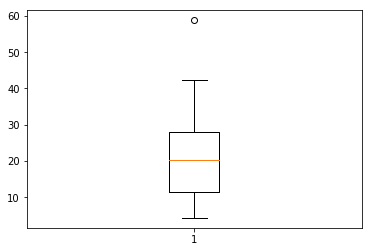

In [18]:
plt.boxplot(dfHI17["POV17"])